## Assignment 6 - Nonparametric Spectral Estimation

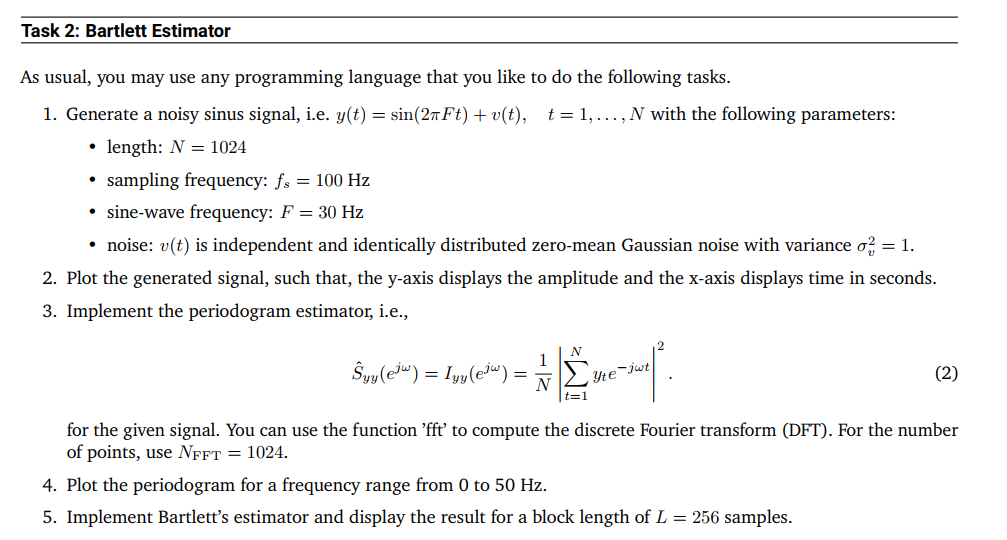

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def generate_noisy_signal(fs, F, A, N, noise_variance):
    """
    Generate a noisy sinusoidal signal.
    Parameters:
        fs: sampling frequency
        F: frequency of the sinusoidal signal
        A: amplitude of the sinusoidal signal
        N: number of samples
    noise_variance: variance of the noise
    Returns:
        signal: the generated noisy signal
    """
    t = np.arange(0, N/fs, 1/fs)
    signal = A * np.sin(2 * np.pi * F * t)
    noise = np.random.normal(0, np.sqrt(noise_variance), N)
    return signal + noise

def plot_signal(signal, fs, title, F=30, A=1, figsize=(12, 6)):
    N = len(signal)
    t = np.arange(0, N/fs, 1/fs)
    plt.figure(figsize=figsize)
    plt.plot(t, signal, label='Noisy signal')
    plt.plot(t, A * np.sin(2 * np.pi * F * t), label='Original signal', linestyle='--')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

def periodogram(signal, fs, title= 'Periodogram of the noisy signal $y(t)$', figsize=(12, 6), plot_periodogram=True):
    N = len(signal)
    f = np.fft.rfftfreq(N, 1/fs)
    S = np.abs(np.fft.rfft(signal))**2 / N
    if plot_periodogram:
        plt.figure(figsize=figsize)
        plt.plot(f, S)
        plt.title(title)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.grid()
        plt.show()
    return f, S

def barlett_estimator(signal, fs, L, title='Bartlett\'s estimator of the power spectral density', figsize=(12, 6), plot_periodogram=True):
    N = len(signal)
    f = np.fft.rfftfreq(L, 1/fs)
    S = np.zeros(len(f))
    for i in range(0, N, L):
       S_i = np.abs(np.fft.rfft(signal[i:i+L]))**2 / (L * N)
       S = S + S_i
    plt.figure(figsize=figsize)
    plt.plot(f, S)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.grid()
    plt.show()
    return f, S

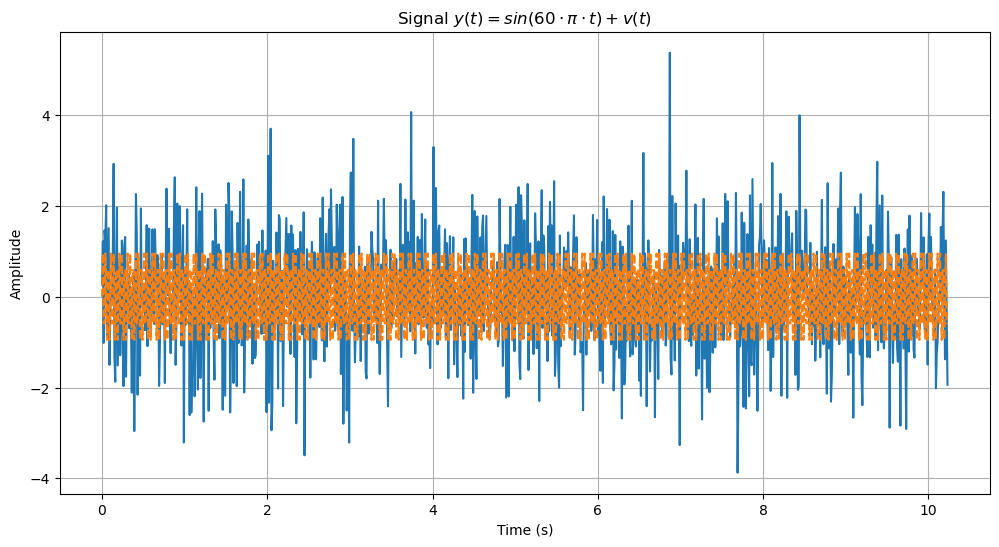

In [8]:
F = 30
A = 1
fs = 100
N = 1024
noise_variance = 1

y = generate_noisy_signal(fs, F, A, N, noise_variance)

plot_signal(y, 100, 'Signal $y(t) = sin(60 \cdot \pi \cdot t) + v(t)$', F=30, A=1)

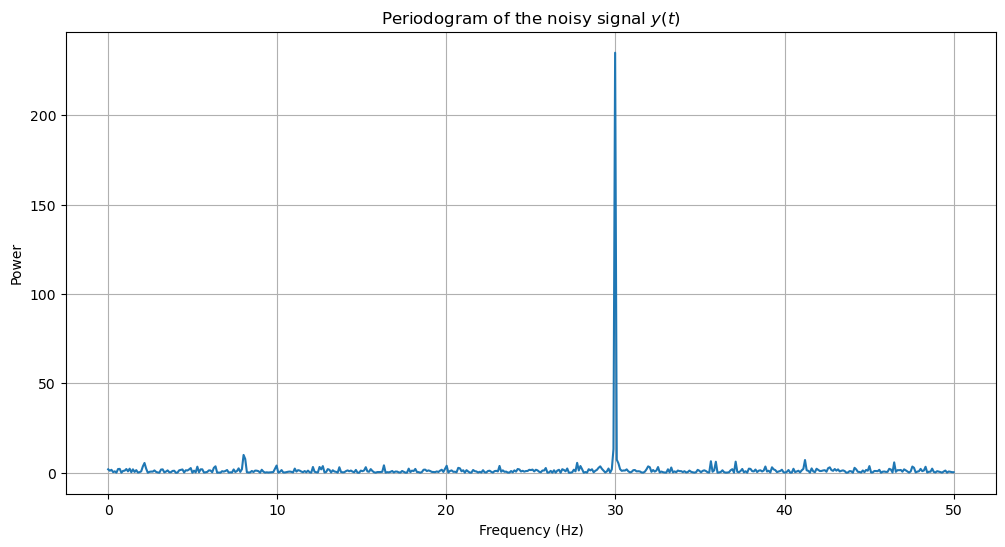

Number of frequency bins:  513
Number of samples:  1024


In [28]:
S, f = periodogram(y, fs, 'Periodogram of the noisy signal $y(t)$', figsize=(12, 6), plot_periodogram=True)
print("Number of frequency bins: ", len(f))
print("Number of samples: ", N)

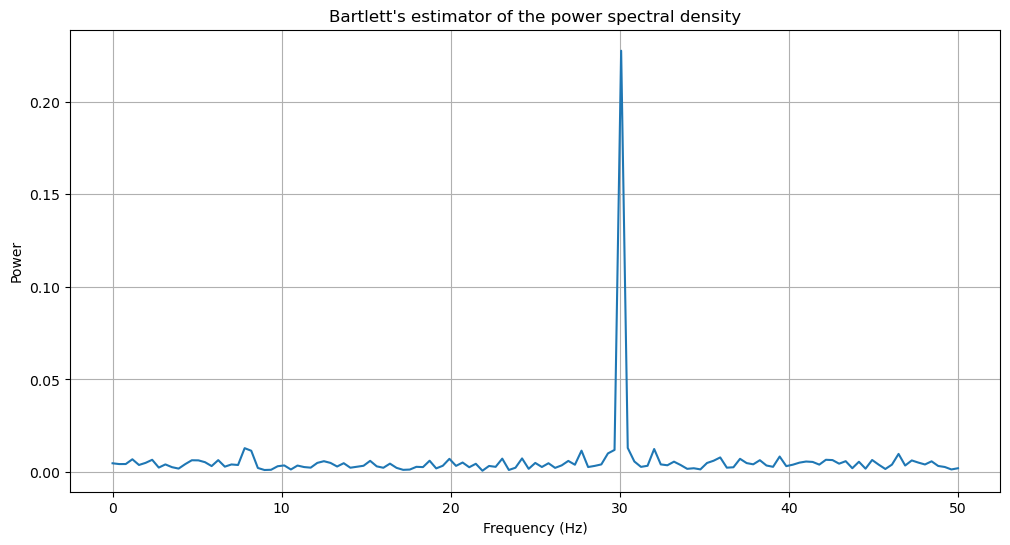

In [35]:
L = 256
S, f = barlett_estimator(y, fs, L, 'Bartlett\'s estimator of the power spectral density', figsize=(12, 6), plot_periodogram=True)

In [36]:
print("Number of frequency bins: ", len(f))
print("Number of samples: ", N)
print("Number of segments: ", N/128)

Number of frequency bins:  129
Number of samples:  1024
Number of segments:  8.0
